## Curating the Machine Learning Model - During ML

### What are the overall metrics we can use to diagnose the model?

If error analysis requires inspecting individual training examples, the following metrics give an overall picture of model performance and thus guide directions of further improvements. There are different cases, which require different solutions.

**Fixes high variance/overfitting**
- Try **getting more training examples**, i.e. get more data (since overfitting usually means the model learns the spurious relation in the small sample)
- Try **reduce the ambiguity in labeling**, or de-noise $p(y|x)$ (sometimes this may be even more effective than simply more data, if data is noisy)
- Try a **smaller set of features or use regularizations** - essentially try to reduce the dimension of feature space (incarnation of the curse of dimensionality)
- **Early stopping**

**Fixes high bias/underfitting**
- Try a **larger set of features**
- Try getting **different set of features**

**Fixes the optimization algorithm, i.e. the algorithm has not reached an optimum**
- Sometimes this is the reason the ML model underfits.
- Run the optimization, such as the gradient descents, **for more epochs**
- Try [different optimization techniques](optimizers.ipynb).

**Fixes the optimization objective, i.e. the objective function being optimized does not approximate the true cost function well**
- Use a **different values for the regularization hyperparameter(s)**
- Try using **different supervised learning algorithm** (some of which only differ in terms of objectives)

### How do I diagnose bias vs. variance?

Inspect the **learning curves**, which is a plot of model performance on the traing and test sets. 

Learning curves usually have a characteristic shape. They are steep initially as the modeling procedure finds the most apparent regularities in the dataset. Then as the modeling procedure is allowed to train on larger and larger datasets, it finds more accurate models. However, the marginal advantage of having more data decreases, so the learning curve becomes less steep. In some cases, the curve flattens out completely because the procedure can no longer improve accuracy even with more training data.


### The *high variance* case: overfitting, where more data would help.

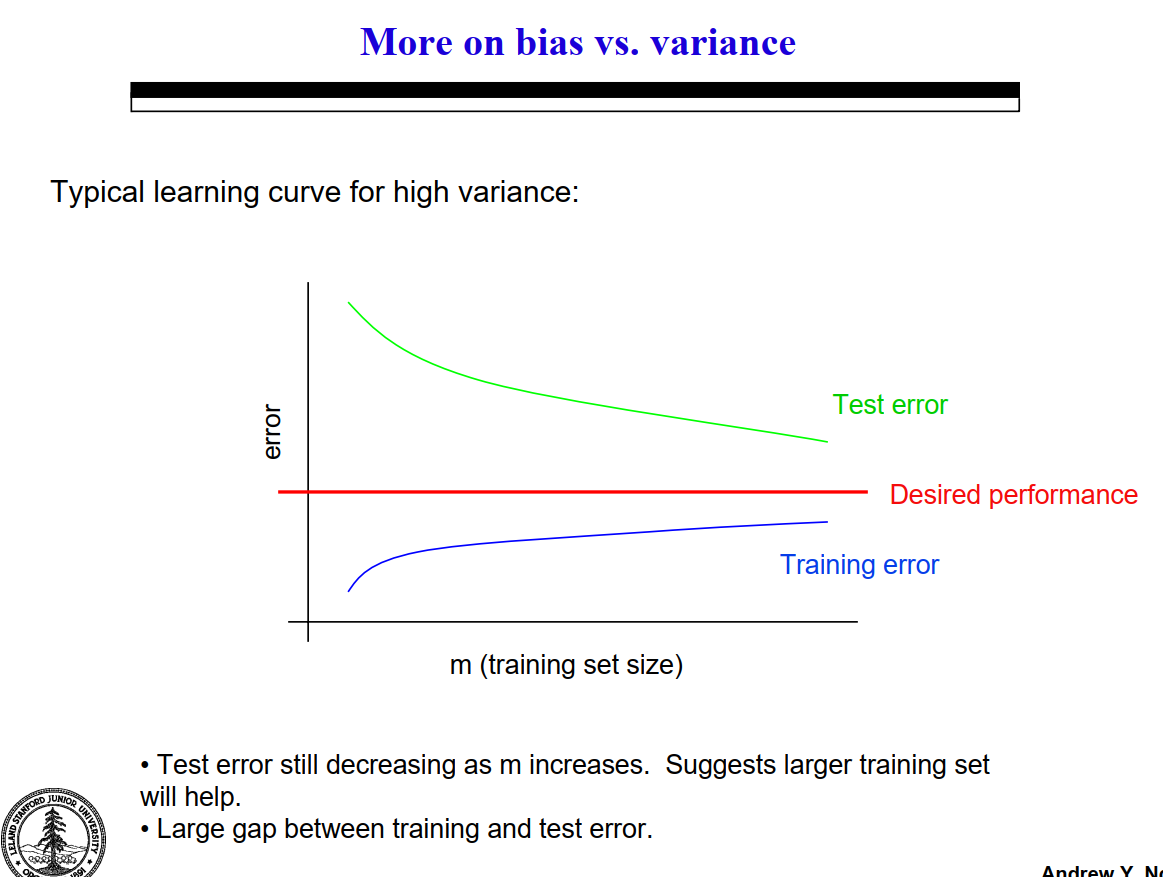

### The *high bias* case: underfitting, where we need models with higher capacity.

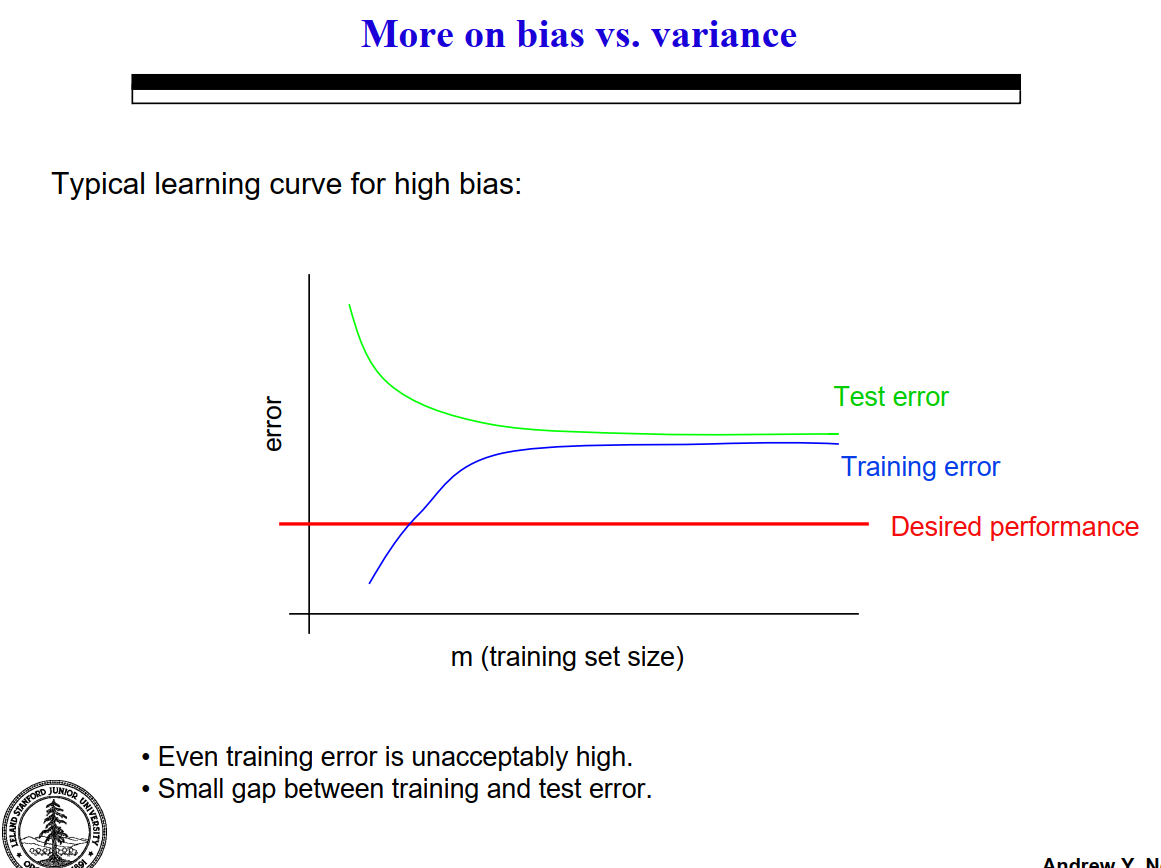

Besides depicting model performance on training and testing as the sample sizes increases (and thus showing generlization errors), the **learning curves across different models can also show model capacity**. For instance, it can show that logistic regression tends to overfit less in small sample, but as sample size increases, the performance of logistic regression starts to degrade compared to decision trees, as its capacity is relatively limited.

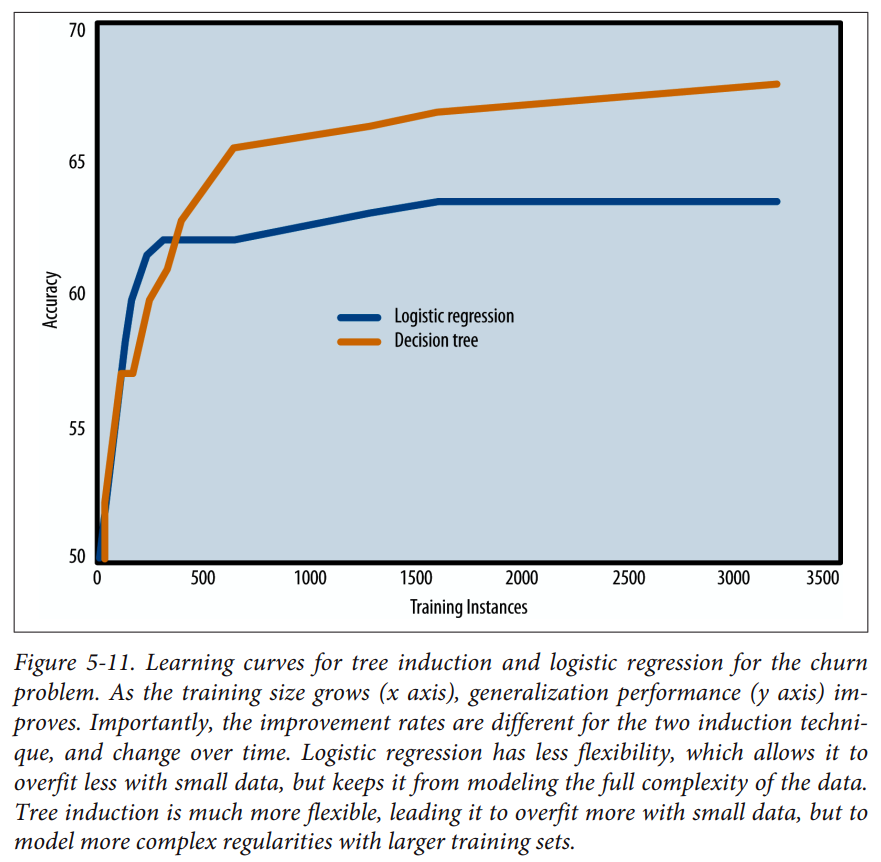

In terms of implementation, `sklearn` has a nice `learning_curve` function. But it plots **score** rather than **error**.

In [12]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

X, y = load_iris(return_X_y=True)
estimator = Ridge()

train_sizes_abs, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=np.array([0.1, 0.33, 0.55, 0.78, 1. ]), cv=5, exploit_incremental_learning=False)

There is also **validation curve**, which is a related concept; but the x axis of validation curve is the varied values of a single hyperparameter. See [cross validation](cross-validation-and-backtesting) for more details.

## References
- [< Hands-on Machine Learning >](https://www.evernote.com/shard/s191/nl/21353936/e4e0f85e-357a-444d-b1a0-ec9cabd008cb?title=Hands-On%20Machine%20Learning%20with%20Scikit-Learn,%20Keras,%20and%20Tensorflow,%202nd%20Edition), Chapter 1, 2, 4.
- MLEDU: Lectures 1, 12, 14.
- Andrew Ng's slides: [Advice for Applying Machine Learning](http://cs229.stanford.edu/materials/ML-advice.pdf)
- [< Data Science for Business >](https://www.evernote.com/shard/s191/nl/21353936/9aad73d6-a134-4902-8199-de505e5fddbb?title=Data%20Science%20for%20Business), Chapter 5.
- [< Applied Predictive Modeling>](https://www.evernote.com/shard/s191/nl/21353936/c9fda431-d9ba-4c73-83aa-d6799f78a46c?title=Applied_Predictive_Modeling%EF%BC%88by_Max_Kuhn_Kjell_Johnson%EF%BC%89.pdf), Chapters 1-2
- [Introduction to Machine Learning in Production](https://www.coursera.org/learn/introduction-to-machine-learning-in-production?specialization=machine-learning-engineering-for-production-mlops)

- [Deploying Machine Learning Models in Production: ML Experiments Management and Workflow Automation](https://www.coursera.org/learn/deploying-machine-learning-models-in-production/quiz/yvoSe/ml-experiments-management-and-workflow-automation)
- [Tensorflow's blogpost on Model Remediation and MinDiff](https://www.tensorflow.org/responsible_ai/model_remediation)